# Let's set up the env and do some math

In [2]:
# 2.1 env
from mlwpy import *
%matplotlib inline

In [3]:
# 2.4 probability
import numpy as np
np.random.randint(1, 7) # pick one from [1,2,3,4,5,6]


4

<BarContainer object of 6 artists>

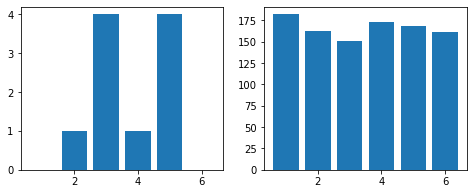

In [4]:
# check if numbers are generated with equal likelihood
import matplotlib.pyplot as plt
few_rolls = np.random.randint(1, 7, size = 10)
many_rolls = np.random.randint(1, 7, size = 1000)

few_counts = np.histogram(few_rolls, bins = np.arange(.5, 7.5))[0]
many_counts = np.histogram(many_rolls, bins = np.arange(.5, 7.5))[0]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (8, 3))
ax1.bar(np.arange(1,7), few_counts)
ax2.bar(np.arange(1,7), many_counts)


(0.0, 55.0)

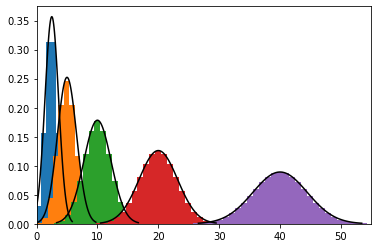

In [5]:
# distribution
import scipy.stats as ss
b = ss.distributions.binom
n = ss.distributions.norm

for flips in [5, 10, 20, 40, 80]:
    # binomial coin flips
    success = np.arange(flips)
    our_distribution = b.pmf(success, flips, .5)
    plt.hist(success, flips, weights = our_distribution)

    # normal approximation to that binomial
    # set the mean and standard deviation
    mu = flips * .5
    std_dev = np.sqrt(flips * .5 * (1- .5))

    # set up both the x and y points for the normal
    # get the ys from the distribution 
    # feed it xs, set those up here
    norm_x = np.linspace(mu-3*std_dev, mu+3*std_dev, 100)
    norm_y = n.pdf(norm_x, mu, std_dev)
    plt.plot(norm_x, norm_y, 'k')

plt.xlim(0, 55)


In [7]:
# linear combinations using numpy
quantity = np.array([2, 12, 3])
costs = np.array([12.5, .5, 1.75])
np.sum(quantity * costs)

36.25

In [9]:
# 3 other ways to do this calculation
print(quantity.dot(costs), 
      np.dot(quantity, costs),
      quantity @ costs,
      
      sep = '\n')

36.25
36.25
36.25


In [10]:
# simple average
values = np.array([10.0, 20.0, 30.0])
weights = np.full_like(values, 1/3) # repeated (1/3)

print("weights:", weights)
print("via mean:", np.mean(values))
print('via weights and dot:', np.dot(weights, values))

weights: [0.3333 0.3333 0.3333]
via mean: 20.0
via weights and dot: 20.0


In [11]:
# weighted average -> expected value
values = np.array([10.0, 20.0, 30.0])
weights = np.array([.5, .25, .25])

np.dot(weights, values)

17.5

In [17]:
# an example for weighted average: toss coin to win money
def is_even(n):
    return n % 2 == 0

winnings = 0.0

for toss_ct in range(10000):
    die_toss = np.random.randint(1, 7)
    winnings += 1.0 if is_even(die_toss) else - 0.5

print(winnings)

2537.5


In [24]:
# an application for sums of squares: sums of squared errors
errors = np.array([5, -5, 3.2, -1.1])
display(pd.DataFrame({"errors": errors, "squared": errors*errors}).style)
np.dot(errors, errors)

,errors,squared
0,5.000000,25.000000
1,-5.000000,25.000000
2,3.200000,10.240000
3,-1.100000,1.210000


61.45